In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fileio import get_saved_all_features
from config import GENRE_COUNTS_PATH

# Set seaborn style
plt.style.use('seaborn-v0_8')

Once we got all our audio files analyzed, we can now explore our collection.

Write a Python script that generates a statistical report to answer the following questions:
 - Which music styles are present in the collection? Plot distribution. 
    - As the model predictions are activations, you need to decide what you consider as the final music style prediction for a track. If you want to consider the possibility of multiple styles per track, define some threshold for activation values. Otherwise, if you want to have a single music style per track, use the one with the maximum activation.
    - We have 400 values which may be a challenge to fit in a compact plot. Predicted styles have a parent broad genre category (all style tags have a format `genre—style`). Therefore you can instead report distribution for parent broad genres. In any case, also provide full results as a separate TSV file (similar to how we report genre distribution in MTG-Jamendo).
 - How fast and danceable is the music? Plot tempo and danceability distribution.
 - Which keys/scales are used in the collection? Plot distribution according to the three profiles we used.
 - What about loudness? Plot integrated loudness LUFS distribution.
 - How is music represented in terms of arousal/valence emotion space? Plot a 2D distribution.
 - How much of the music is vocal vs instrumental? 

In your written report document, comment on your observations.
 - Is this collection diverse in terms of music styles, tempos, tonality, emotion, etc?
 - Comment on differences in key and scale estimation using the three profiles (`temperley`, `krumhansl`, `edma`). What is the % of tracks on which all three estimations agree? If we had to select only one profile to present to the users, which one should we use?
 - Comment on loudness. Does its distribution make sense?  For more about loudness see, for example, https://majormixing.com/how-loud-should-my-master-be/

Find the best way to present results (e.g., select types of plots that efficiently present all information). Some of the Python tools that can be useful to present results:
 - https://pandas.pydata.org/
 - https://seaborn.pydata.org/
 - https://matplotlib.org/


In [2]:
df = pd.DataFrame(get_saved_all_features())
df.head()

,tempo,key_temperley,key_krumhansl,key_edma,loudness,genre,instrumental_probability,danceability_probability,arousal,valence
0,99.0,C major,E minor,E minor,-7.301064,Hip Hop---Horrorcore,0.001786,0.998107,5.401786,4.319933
1,71.0,Eb minor,Eb minor,Eb minor,-13.323455,"Folk, World, & Country---Folk",0.028662,0.279656,3.244470,3.910822
2,155.0,E major,Ab minor,Ab minor,-6.061895,Rock---Power Metal,0.918112,0.052946,6.089415,3.630838
3,78.0,A major,E major,E major,-8.223468,Rock---Punk,0.108787,0.653288,8.030258,6.055448
4,104.0,G major,B minor,B minor,-6.439927,Rock---Blues Rock,0.105858,0.290942,6.749146,6.243909


### Which music styles are present in the collection? Plot distribution. 
- As the model predictions are activations, you need to decide what you consider as the final music style prediction for a track. If you want to consider the possibility of multiple styles per track, define some threshold for activation values. Otherwise, if you want to have a single music style per track, use the one with the maximum activation.
- We have 400 values which may be a challenge to fit in a compact plot. Predicted styles have a parent broad genre category (all style tags have a format `genre—style`). Therefore you can instead report distribution for parent broad genres. In any case, also provide full results as a separate TSV file (similar to how we report genre distribution in MTG-Jamendo).

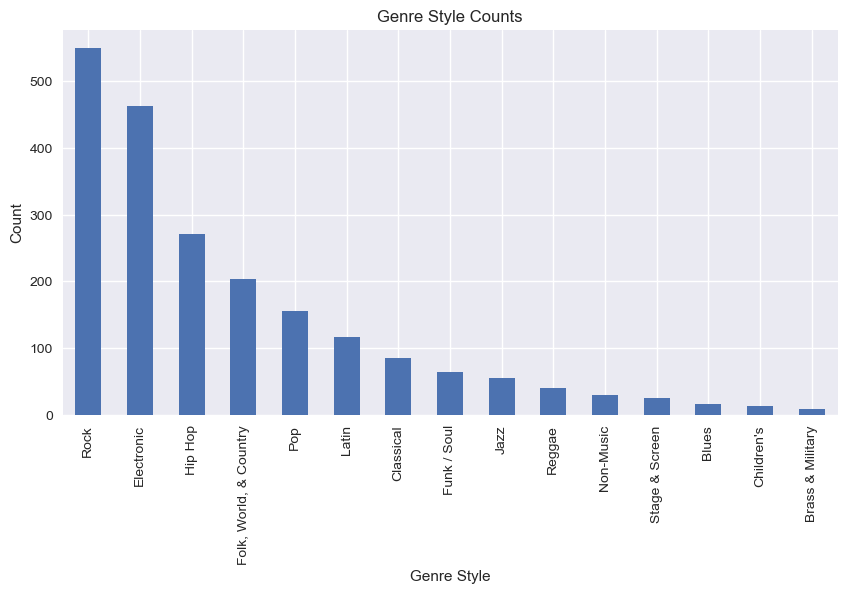

In [3]:
# Split genre names at ---
df_style = df['genre'].apply(lambda x: x.split('---')[0])

# Plot genre style counts
df_style.value_counts().plot(kind='bar', title='Genre Style Counts', figsize=(10, 5), xlabel='Genre Style', ylabel='Count')

# Save genre counts
df['genre'].value_counts().to_csv(GENRE_COUNTS_PATH, sep='\t')

### How fast and danceable is the music? 
- Plot tempo and danceability distribution.

<Axes: title={'center': 'Tempo Distribution'}, xlabel='Tempo (BPM)', ylabel='Count'>

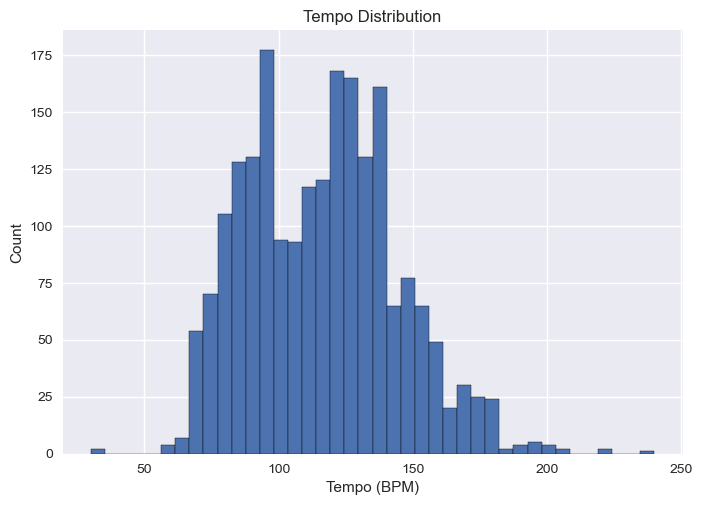

In [4]:
# Plot tempo distribution 
df['tempo'].plot(kind='hist', bins=40, title='Tempo Distribution', edgecolor='black', xlabel='Tempo (BPM)', ylabel='Count')

<Axes: title={'center': 'Danceability Distribution'}, xlabel='Danceability', ylabel='Count'>

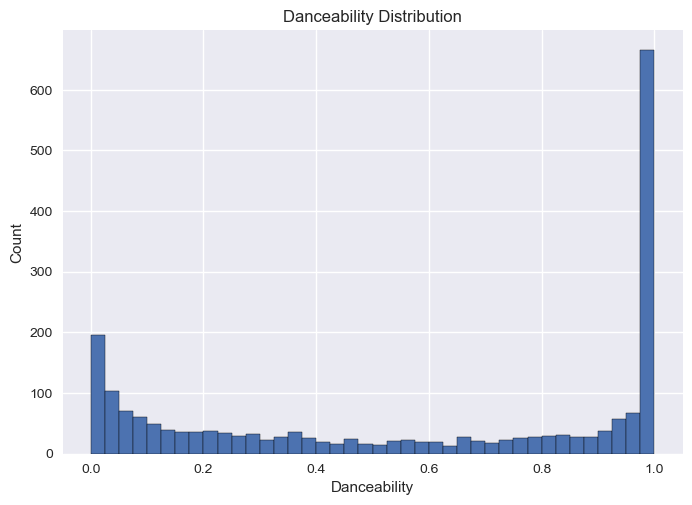

In [5]:
# Plot danceability distribution
df['danceability_probability'].plot(kind='hist', bins=40, title='Danceability Distribution', edgecolor='black', xlabel='Danceability', ylabel='Count')

### Which keys/scales are used in the collection? 
- Plot distribution according to the three profiles we used.

<Axes: title={'center': 'Key Counts'}, xlabel='Key', ylabel='Count'>

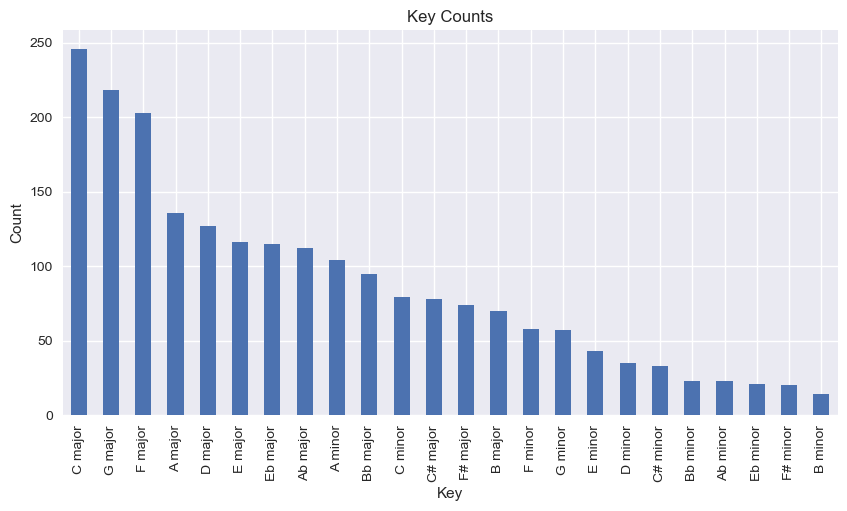

In [6]:
# Plot temperley key counts
df['key_temperley'].value_counts().plot(kind='bar', title='Key Counts', figsize=(10,5), xlabel='Key', ylabel='Count')


<Axes: title={'center': 'Krumhansl Key Counts'}, xlabel='Key', ylabel='Count'>

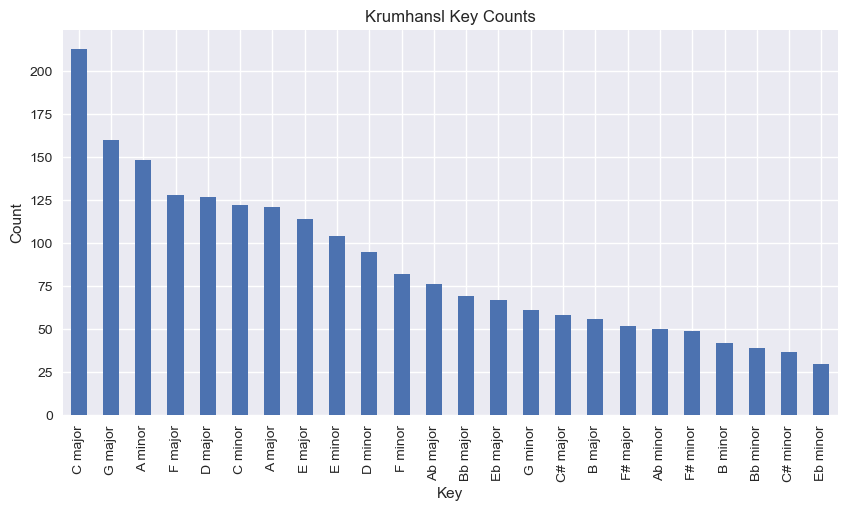

In [7]:
# Plot krumhansl key counts
df['key_krumhansl'].value_counts().plot(kind='bar', title='Krumhansl Key Counts', figsize=(10,5), xlabel='Key', ylabel='Count')

<Axes: title={'center': 'Edma Key Counts'}, xlabel='Key', ylabel='Count'>

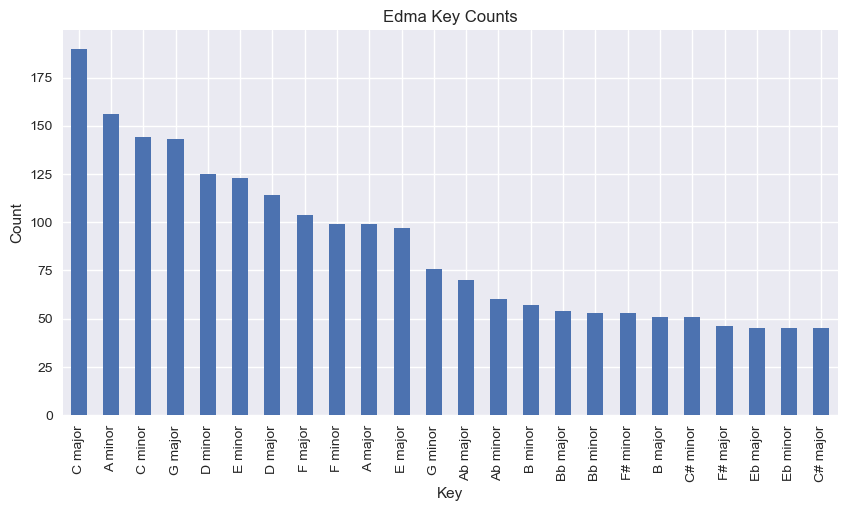

In [8]:
# Plot edma key counts
df['key_edma'].value_counts().plot(kind='bar', title='Edma Key Counts', figsize=(10,5), xlabel='Key', ylabel='Count')

### What about loudness? 
- Plot integrated loudness LUFS distribution.

<Axes: title={'center': 'Loudness Distribution'}, xlabel='Loudness (dB)', ylabel='Count'>

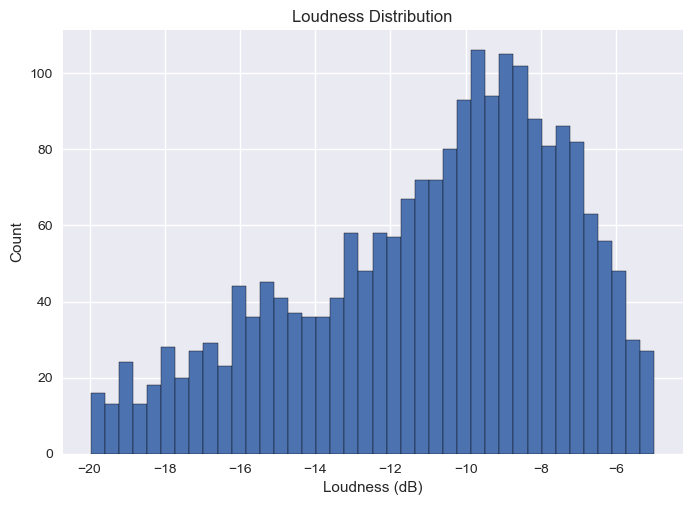

In [9]:
# Plot loudness distribution
df['loudness'].plot(kind='hist', bins=40, title='Loudness Distribution', edgecolor='black', xlabel='Loudness (dB)', ylabel='Count')

### How is music represented in terms of arousal/valence emotion space? 
- Plot a 2D distribution.

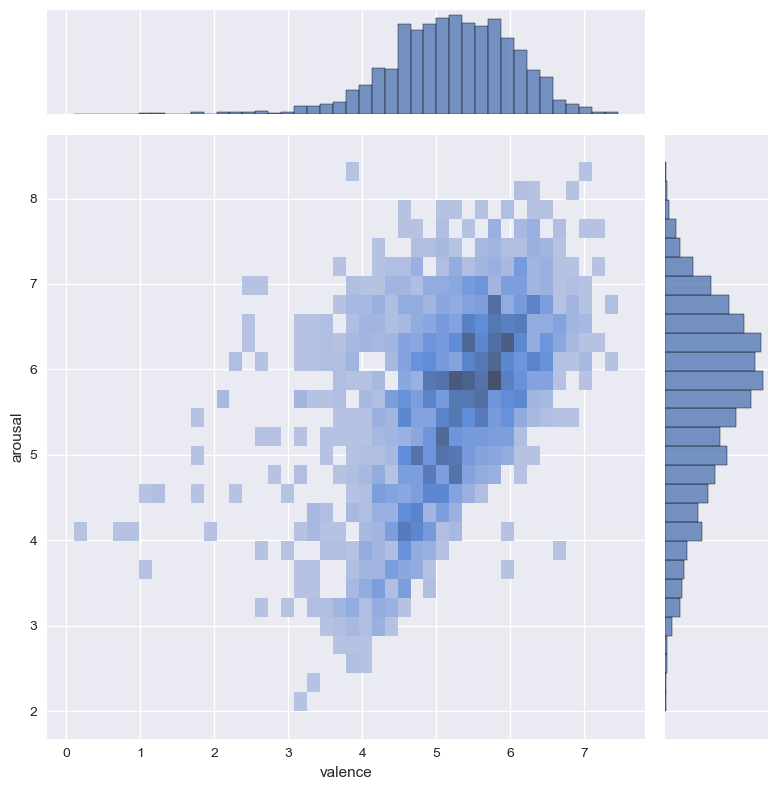

In [10]:
# Plot a 2D distribution of arousal and valence
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.jointplot(x='valence', y='arousal', data=df, height=8, kind='hist')


### How much of the music is vocal vs instrumental? 

<Axes: title={'center': 'Instrumental Probability Distribution'}, xlabel='Instrumental Probability', ylabel='Count'>

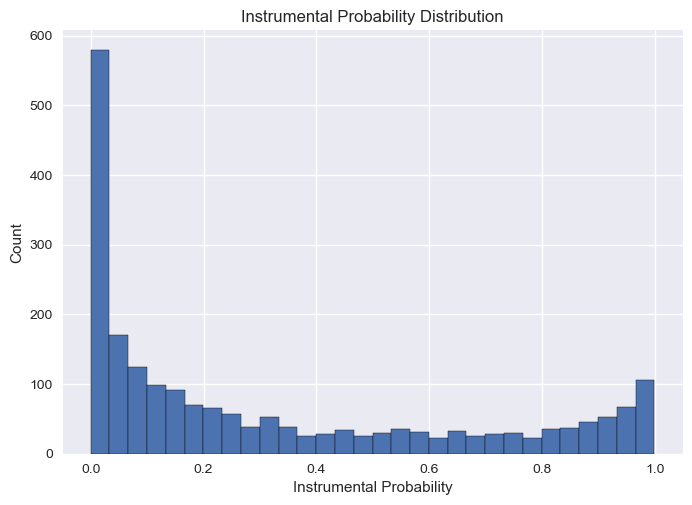

In [11]:
# Plot instrumental probability distribution
df['instrumental_probability'].plot(kind='hist', bins=30, title='Instrumental Probability Distribution', edgecolor='black', xlabel='Instrumental Probability', ylabel='Count')

<Axes: title={'center': 'Vocal Probability Distribution'}, xlabel='Vocal Probability', ylabel='Count'>

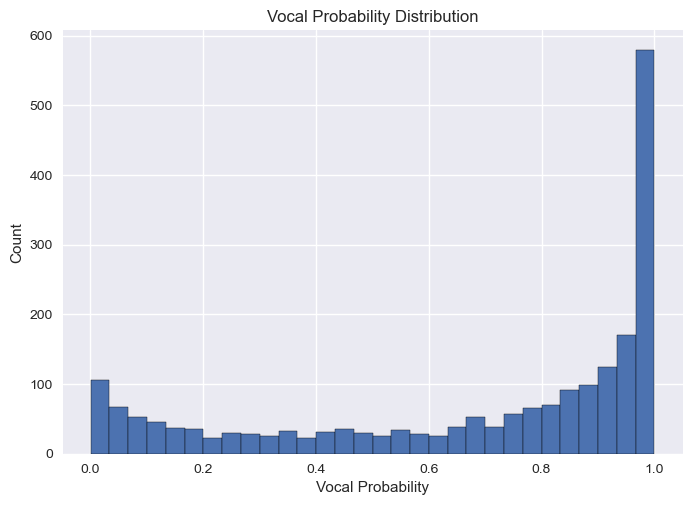

In [12]:
# Plot vocal probability distribution
df_vocal = 1 - df['instrumental_probability']
df_vocal.plot(kind='hist', bins=30, title='Vocal Probability Distribution', edgecolor='black', xlabel='Vocal Probability', ylabel='Count')